In [100]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib as mpl
import threading
import pickle
import joblib
import copy
import threading
from sklearn import impute, preprocessing, model_selection, base, metrics, linear_model, pipeline, ensemble, svm, multiclass, neighbors, compose, datasets, decomposition, manifold, tree
import tensorflow as tf
from tensorflow import keras
import cv2
from scratch_models import my_decorators

In [25]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [26]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

Let us have a peek at the data.

In [27]:
# List the first item of each class
def list_distinct(X, y):
    distinct_items = []
    for i in range(10):
        distinct_items.append(X[y==i][0])
    return distinct_items

In [28]:
# Plot all distinct images
def plot_grid(items, rows=2, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*2))
    for item, class_, axis in zip(items, range(0,10), axes.flat):
        axis.imshow(item, cmap='binary')
        axis.set_title(class_)
        axis.axis('off')

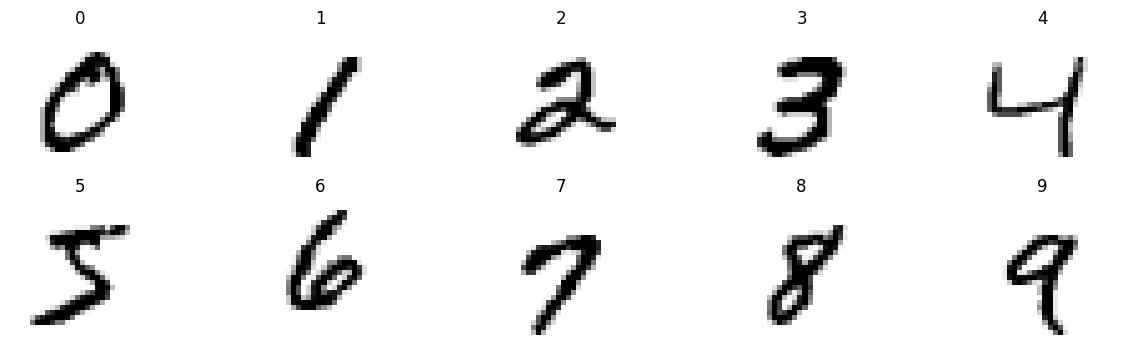

In [29]:
plot_grid(list_distinct(X_train, y_train))

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

I had created a custom decorator in ``my_decorators`` module of this repo, to convert functions into sklearn FunctionTransformers, because I like working cleanly and writing Pipeline friendly code and creating custom transformers for small tasks might be an overkill.

There isn't much scope of pre-processing, the data looks quite clean enough. I will, hence, be applying the following transformations only before moving to training phase:
* Flattening
* Normalization
* Visualizations

In [32]:
# Define the function to flatten images
@my_decorators.sklearn_transformer
def Flatten(X, y=None):
    n = X.shape[0]
    b = X.shape[1:]
    return X.reshape(n, np.prod(b))

In [62]:
X_train_flat = Flatten.fit_transform(X_train)

**Visualizations**

Let us use **tSNE** to project the data down to 2 dimensions. The following code compresses the first 4000 images into 2 dimensions that preserve the highest information content.
I have used only 4000 images for cleaner plot because using all images would clutter the plot. Also, applying tSNE on full dataset will take very long as this algorithm does not scale very well with the size of dataset. Since our goal is only visualizing, not using full dataset won't hurt much.

In [63]:
tsne = manifold.TSNE(n_components=2, random_state=42)

X_viz = tsne.fit_transform(X_train_flat[:4000])

In [120]:
def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = preprocessing.MinMaxScaler().fit_transform(X)
    
    
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],
                    c=[cmap(float(digit) / 9)], alpha=0.5)
    plt.axis("off")
    ax = plt.gca()  # get current axes
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is not None:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)

IndexError: index 207 is out of bounds for axis 0 with size 200

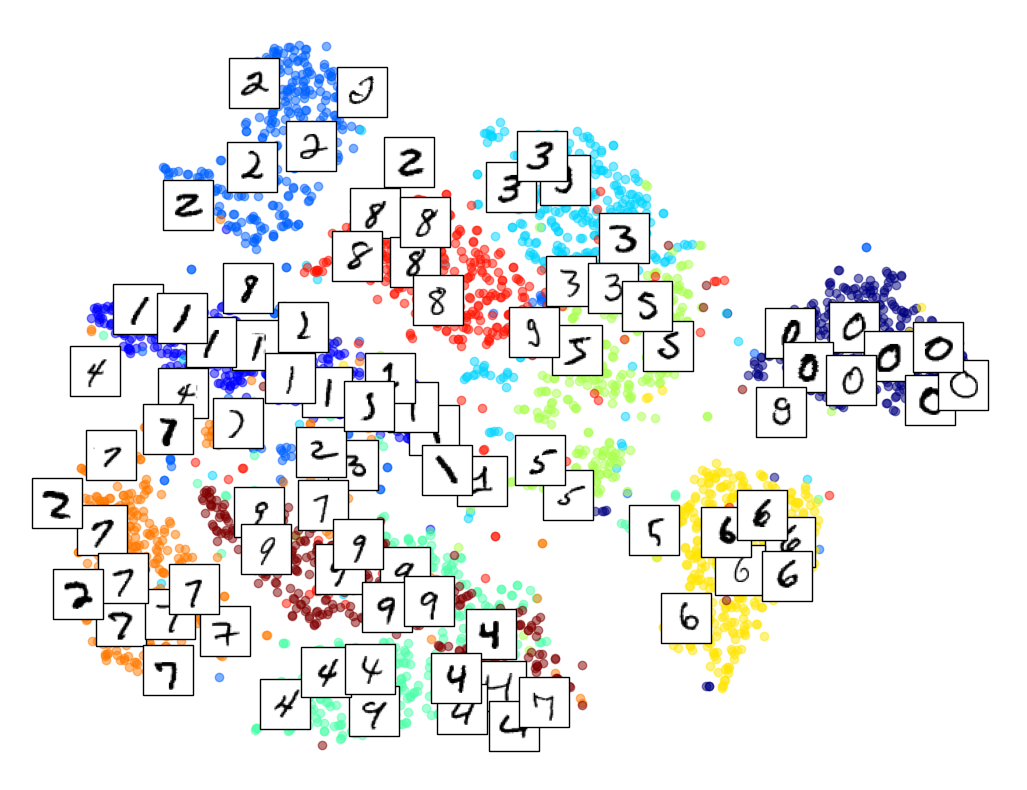

In [121]:
plot_digits(X_viz, y_train[:4000], images=X_train[:200])


Kartik Kumar
For more projects, please visit [My GithHub Page](https://github.com/ryuukkk)